## Import Libraries 

In [31]:
import tensorflow as tf
import os
import cv2
import numpy as np
import imghdr
from matplotlib import pyplot as plt
import urllib
import urllib.request
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from keras.models import load_model

In [4]:
print(tf.__version__)

2.10.0


In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']
data_dir = 'data' 

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## Load the data

In [95]:
data = tf.keras.utils.image_dataset_from_directory('data') 

Found 478 files belonging to 2 classes.


In [96]:
data_iterator = data.as_numpy_iterator()

In [97]:
batch = data_iterator.next()

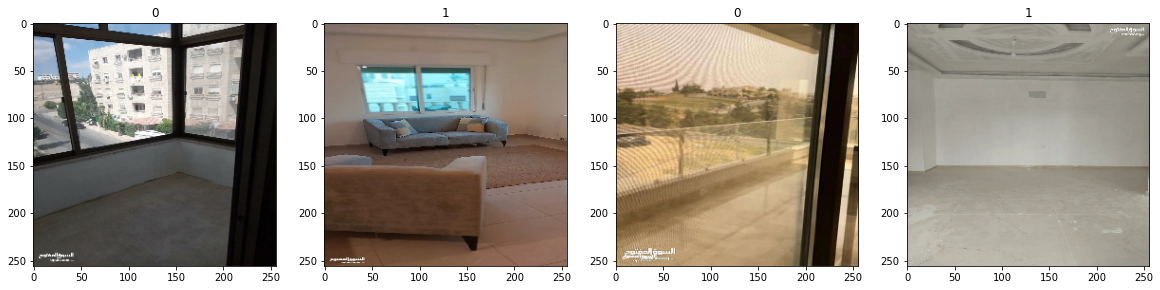

In [98]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [99]:
data = data.map(lambda x,y: (x/255, y))

In [100]:
data.as_numpy_iterator().next()

(array([[[[0.34509805, 0.53333336, 0.7764706 ],
          [0.34509805, 0.53333336, 0.7764706 ],
          [0.34509805, 0.53333336, 0.7764706 ],
          ...,
          [0.93071383, 0.86796874, 0.8091452 ],
          [0.9523131 , 0.90133274, 0.83858764],
          [0.8523361 , 0.8013557 , 0.7386106 ]],
 
         [[0.34509805, 0.53333336, 0.7764706 ],
          [0.34509805, 0.53333336, 0.7764706 ],
          [0.34509805, 0.53333336, 0.7764706 ],
          ...,
          [0.89973956, 0.84287685, 0.7820925 ],
          [0.94516695, 0.8951631 , 0.832418  ],
          [0.93923867, 0.89217985, 0.82943475]],
 
         [[0.34509805, 0.53333336, 0.7764706 ],
          [0.34509805, 0.53333336, 0.7764706 ],
          [0.34509805, 0.53333336, 0.7764706 ],
          ...,
          [0.93921566, 0.8882353 , 0.8254902 ],
          [0.93466604, 0.88564646, 0.82290137],
          [0.9365885 , 0.8895297 , 0.8267846 ]],
 
         ...,
 
         [[0.2509804 , 0.2523131 , 0.25164676],
          [0.25423

In [101]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [102]:
train_size

10

In [103]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [111]:
model = Sequential()

In [112]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [113]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 30, 30, 128)     

In [115]:
logdir='logs'

In [116]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [117]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
10/10 [==============================] - 14s 1s/step - loss: 1.3293 - accuracy: 0.5094 - val_loss: 0.6599 - val_accuracy: 0.5938
Epoch 2/20
10/10 [==============================] - 13s 1s/step - loss: 0.6529 - accuracy: 0.5656 - val_loss: 0.5840 - val_accuracy: 0.6146
Epoch 3/20
10/10 [==============================] - 25s 2s/step - loss: 0.5632 - accuracy: 0.6844 - val_loss: 0.4220 - val_accuracy: 0.8125
Epoch 4/20
10/10 [==============================] - 18s 2s/step - loss: 0.4394 - accuracy: 0.8344 - val_loss: 0.3320 - val_accuracy: 0.9062
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.5003 - accuracy: 0.8094 - val_loss: 0.2932 - val_accuracy: 0.9167
Epoch 6/20
10/10 [==============================] - 19s 2s/step - loss: 0.3545 - accuracy: 0.8656 - val_loss: 0.3087 - val_accuracy: 0.8854
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.2801 - accuracy: 0.9094 - val_loss: 0.1420 - val_accuracy: 0.9792
Epoch 8/20
10/10 [==

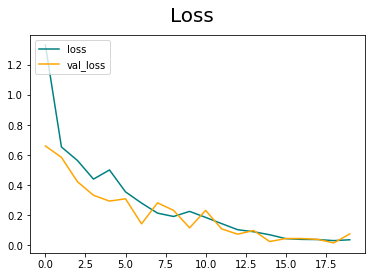

In [118]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

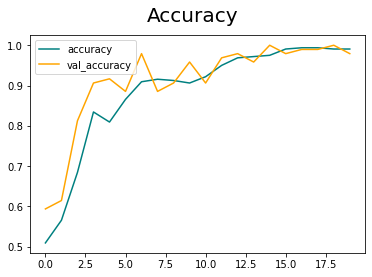

In [119]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [120]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [121]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 445ms/step


In [122]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [123]:
import cv2

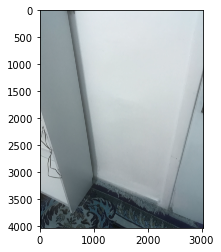

In [175]:
img = cv2.imread('IMG_0924.jpg')
plt.imshow(img)
plt.show()

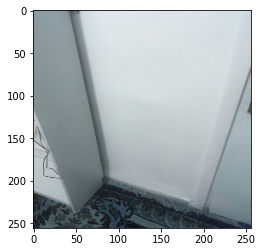

In [176]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [177]:
pred=model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 41ms/step


In [178]:
pred

array([[0.9779714]], dtype=float32)

In [179]:
0.09245998
if pred > 0.5: 
    print('Room')
else:
    print('Balcony')

Room


In [153]:
from keras.models import load_model

In [150]:
model.save('indoorModel')

INFO:tensorflow:Assets written to: indoorModel/assets


INFO:tensorflow:Assets written to: indoorModel/assets


In [155]:
modelTest = load_model("indoorModel")

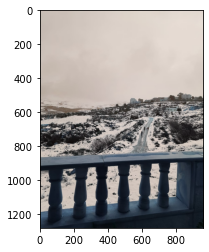

In [170]:
img2 = cv2.imread('balcony2.png')
plt.imshow(img2)
plt.show()

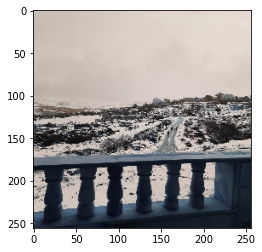

In [171]:
resize = tf.image.resize(img2, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [172]:
testpred=modelTest.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 37ms/step


In [173]:
testpred

array([[2.0390215e-05]], dtype=float32)

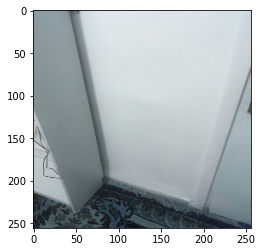

1/1 [==============================] - 0s 36ms/step
[[0.9779714]]
Room


In [180]:
resp = urllib.request.urlopen("https://res.cloudinary.com/dmrf3fisu/image/upload/v1667211815/rsi4z5g4zbphwlanb34u.jpg")
image = np.asarray(bytearray(resp.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)
resize = tf.image.resize(image, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()
predication = modelTest.predict(np.expand_dims(resize/255, 0))
print(predication)
if predication > 0.5: 
    print(f'Room')
else:
    print(f'Balcony')
# if predication > 0.5:
#     print({"predication": "Room"})
# else:
#     print({"predication": "Balcony"})